In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import warnings

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [12]:
# Load processed data
processed_dir = '../Data/processed/'
data_path = os.path.join(processed_dir, 'eda_data.csv')

# Check if processed data exists, if not use original data
if os.path.exists(data_path):
    processed_df = pd.read_csv(data_path)
    print(f"Loaded processed data: {df.shape}")
else:
    print("Processed data not found. Please run the Data Wrangling notebook first.")

# Define data paths
data_dir = '../Data/'
application_file = os.path.join(data_dir, 'application_record.csv')
application_df = pd.read_csv(application_file)
processed_features = ['ID', 'AGE_YEARS', 'EMPLOYMENT_YEARS', 'IS_UNEMPLOYED','TARGET', 'MONTHS_HISTORY', 'WORST_STATUS']
processed_df = processed_df[processed_features]
df = pd.merge(application_df, processed_df, on='ID', how='inner')
# Preview the data
df.head()

Loaded processed data: (36457, 22)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,EMPLOYMENT_YEARS,IS_UNEMPLOYED,TARGET,MONTHS_HISTORY,WORST_STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32.9,12.4,True,1,16,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32.9,12.4,True,1,15,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58.8,3.1,True,1,30,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.3,8.4,True,1,5,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.3,8.4,True,1,5,-1


In [13]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [14]:
df.OCCUPATION_TYPE.replace(np.nan, 'Other', inplace = True)

In [15]:
# Summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,36457.0,NaN,NaN,NaN,5078226.996544,41875.240788,5008804.0,5042028.0,5074614.0,5115396.0,5150487.0
CODE_GENDER,36457,2,F,24430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,36457,2,N,22614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,36457,2,Y,24506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,36457.0,NaN,NaN,NaN,0.430315,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,NaN,NaN,NaN,186685.736662,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
NAME_INCOME_TYPE,36457,5,Working,18819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME_EDUCATION_TYPE,36457,5,Secondary / secondary special,24777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME_FAMILY_STATUS,36457,5,Married,25048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME_HOUSING_TYPE,36457,6,House / apartment,32548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


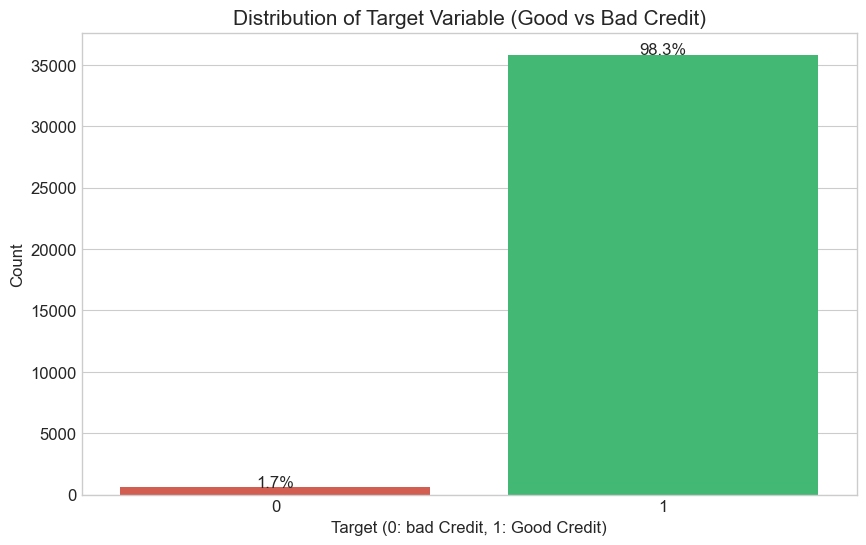

Good Credit (0): 616 (1.7%)
Bad Credit (1): 35841 (98.3%)


In [16]:
# Plot target distribution
plt.figure(figsize=(10, 6))
target_counts = df['TARGET'].value_counts()
ax = sns.countplot(x='TARGET', data=df, palette=['#e74c3c', '#2ecc71'])

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribution of Target Variable (Good vs Bad Credit)', fontsize=15)
plt.xlabel('Target (0: bad Credit, 1: Good Credit)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

print(f"Good Credit (0): {target_counts[0]} ({100 * target_counts[0] / total:.1f}%)")
print(f"Bad Credit (1): {target_counts[1]} ({100 * target_counts[1] / total:.1f}%)")

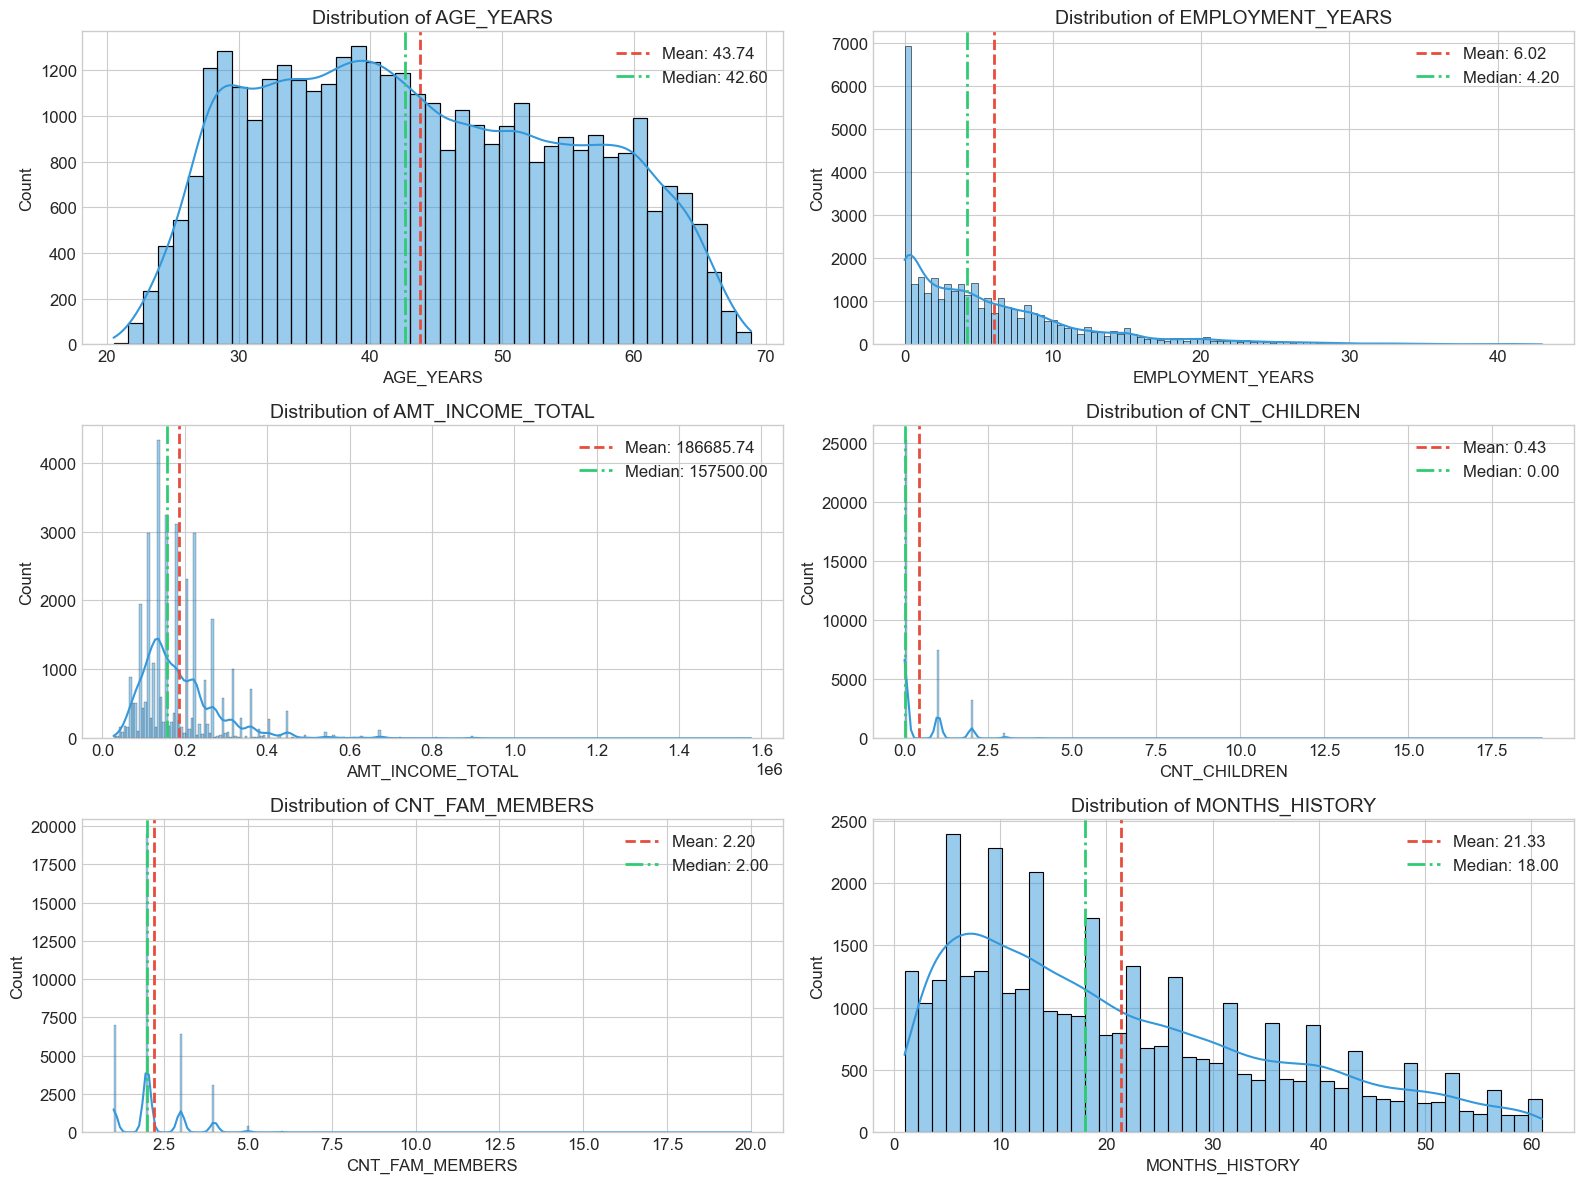

In [17]:
# Define numerical features
numerical_features = ['AGE_YEARS', 'EMPLOYMENT_YEARS', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'MONTHS_HISTORY']

# Function to plot histograms for numerical features
def plot_histograms(df, features, ncols=2):
    nrows = (len(features) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        ax = axes[i]
        sns.histplot(df[feature], kde=True, ax=ax, color='#3498db')
        
        # Add mean and median lines
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        
        ax.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='#2ecc71', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2f}')
        
        ax.set_title(f'Distribution of {feature}', fontsize=14)
        ax.legend()
        
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

# Plot histograms for numerical features
plot_histograms(df, numerical_features)

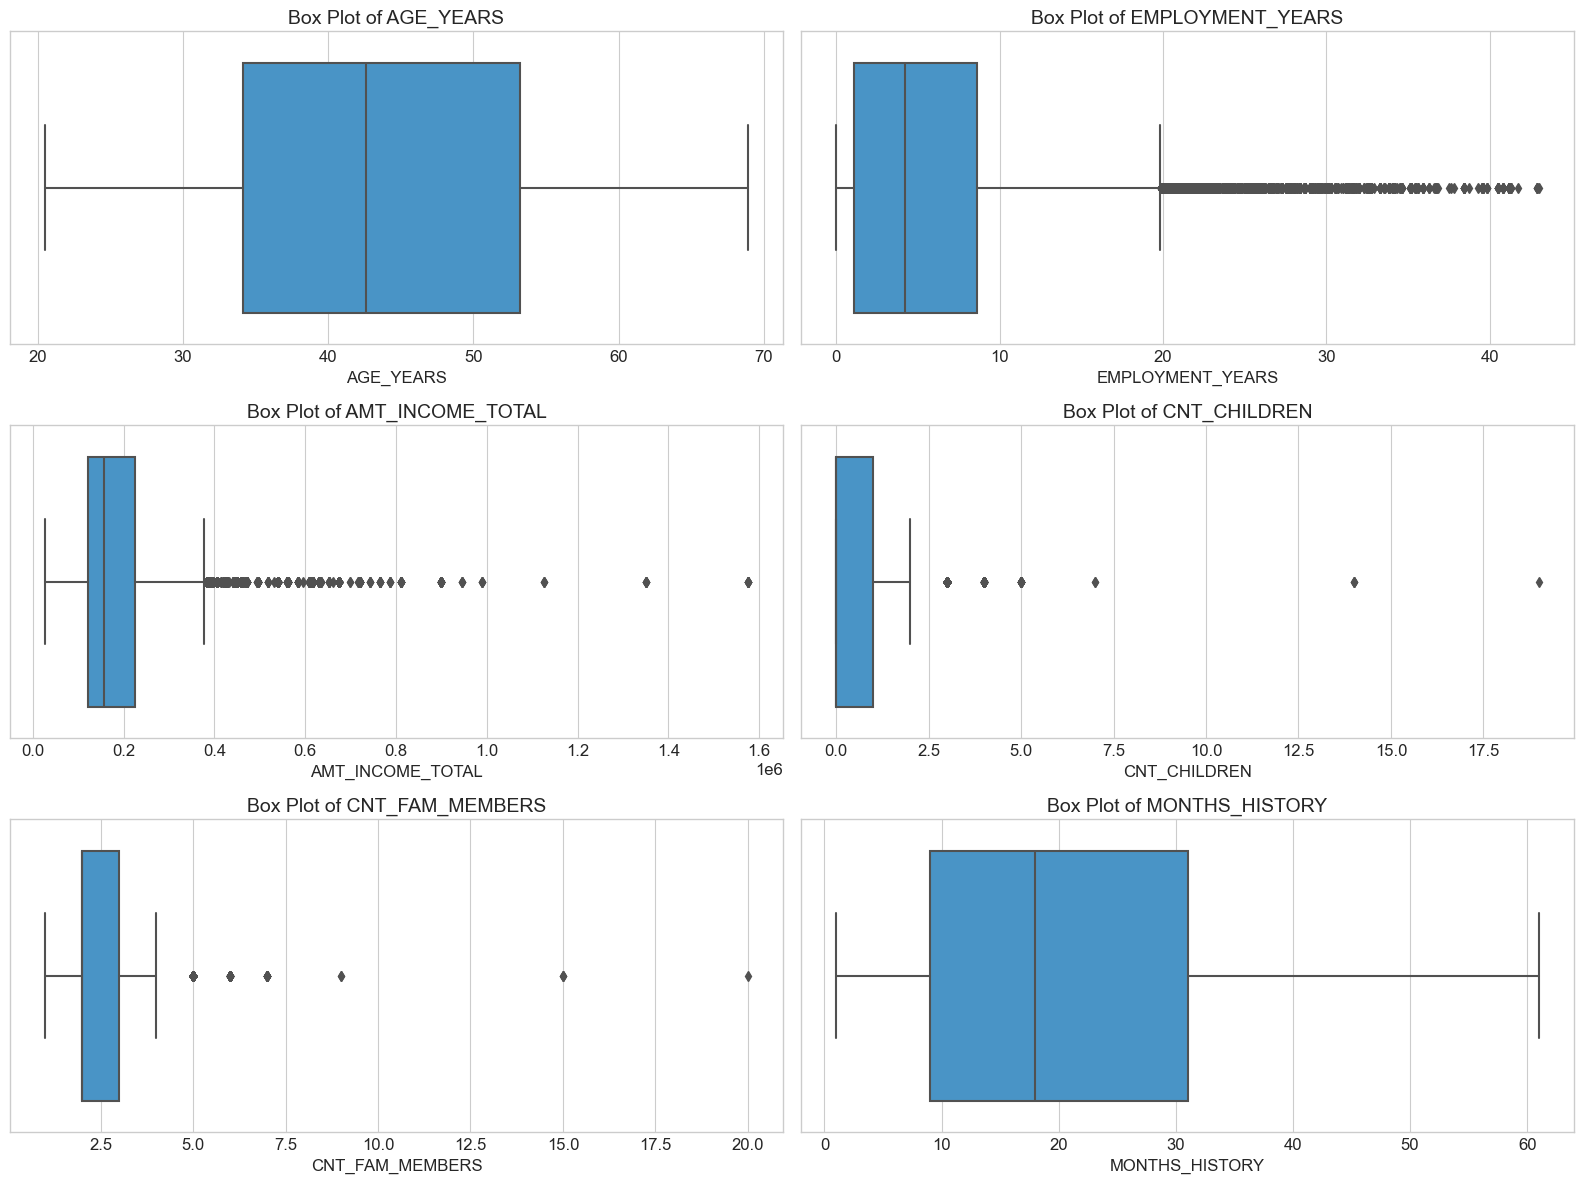

In [18]:
# Box plots for numerical features to detect outliers
def plot_boxplots(df, features, ncols=2):
    nrows = (len(features) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        ax = axes[i]
        sns.boxplot(x=df[feature], ax=ax, color='#3498db')
        ax.set_title(f'Box Plot of {feature}', fontsize=14)
        
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

# Plot box plots for numerical features
plot_boxplots(df, numerical_features)

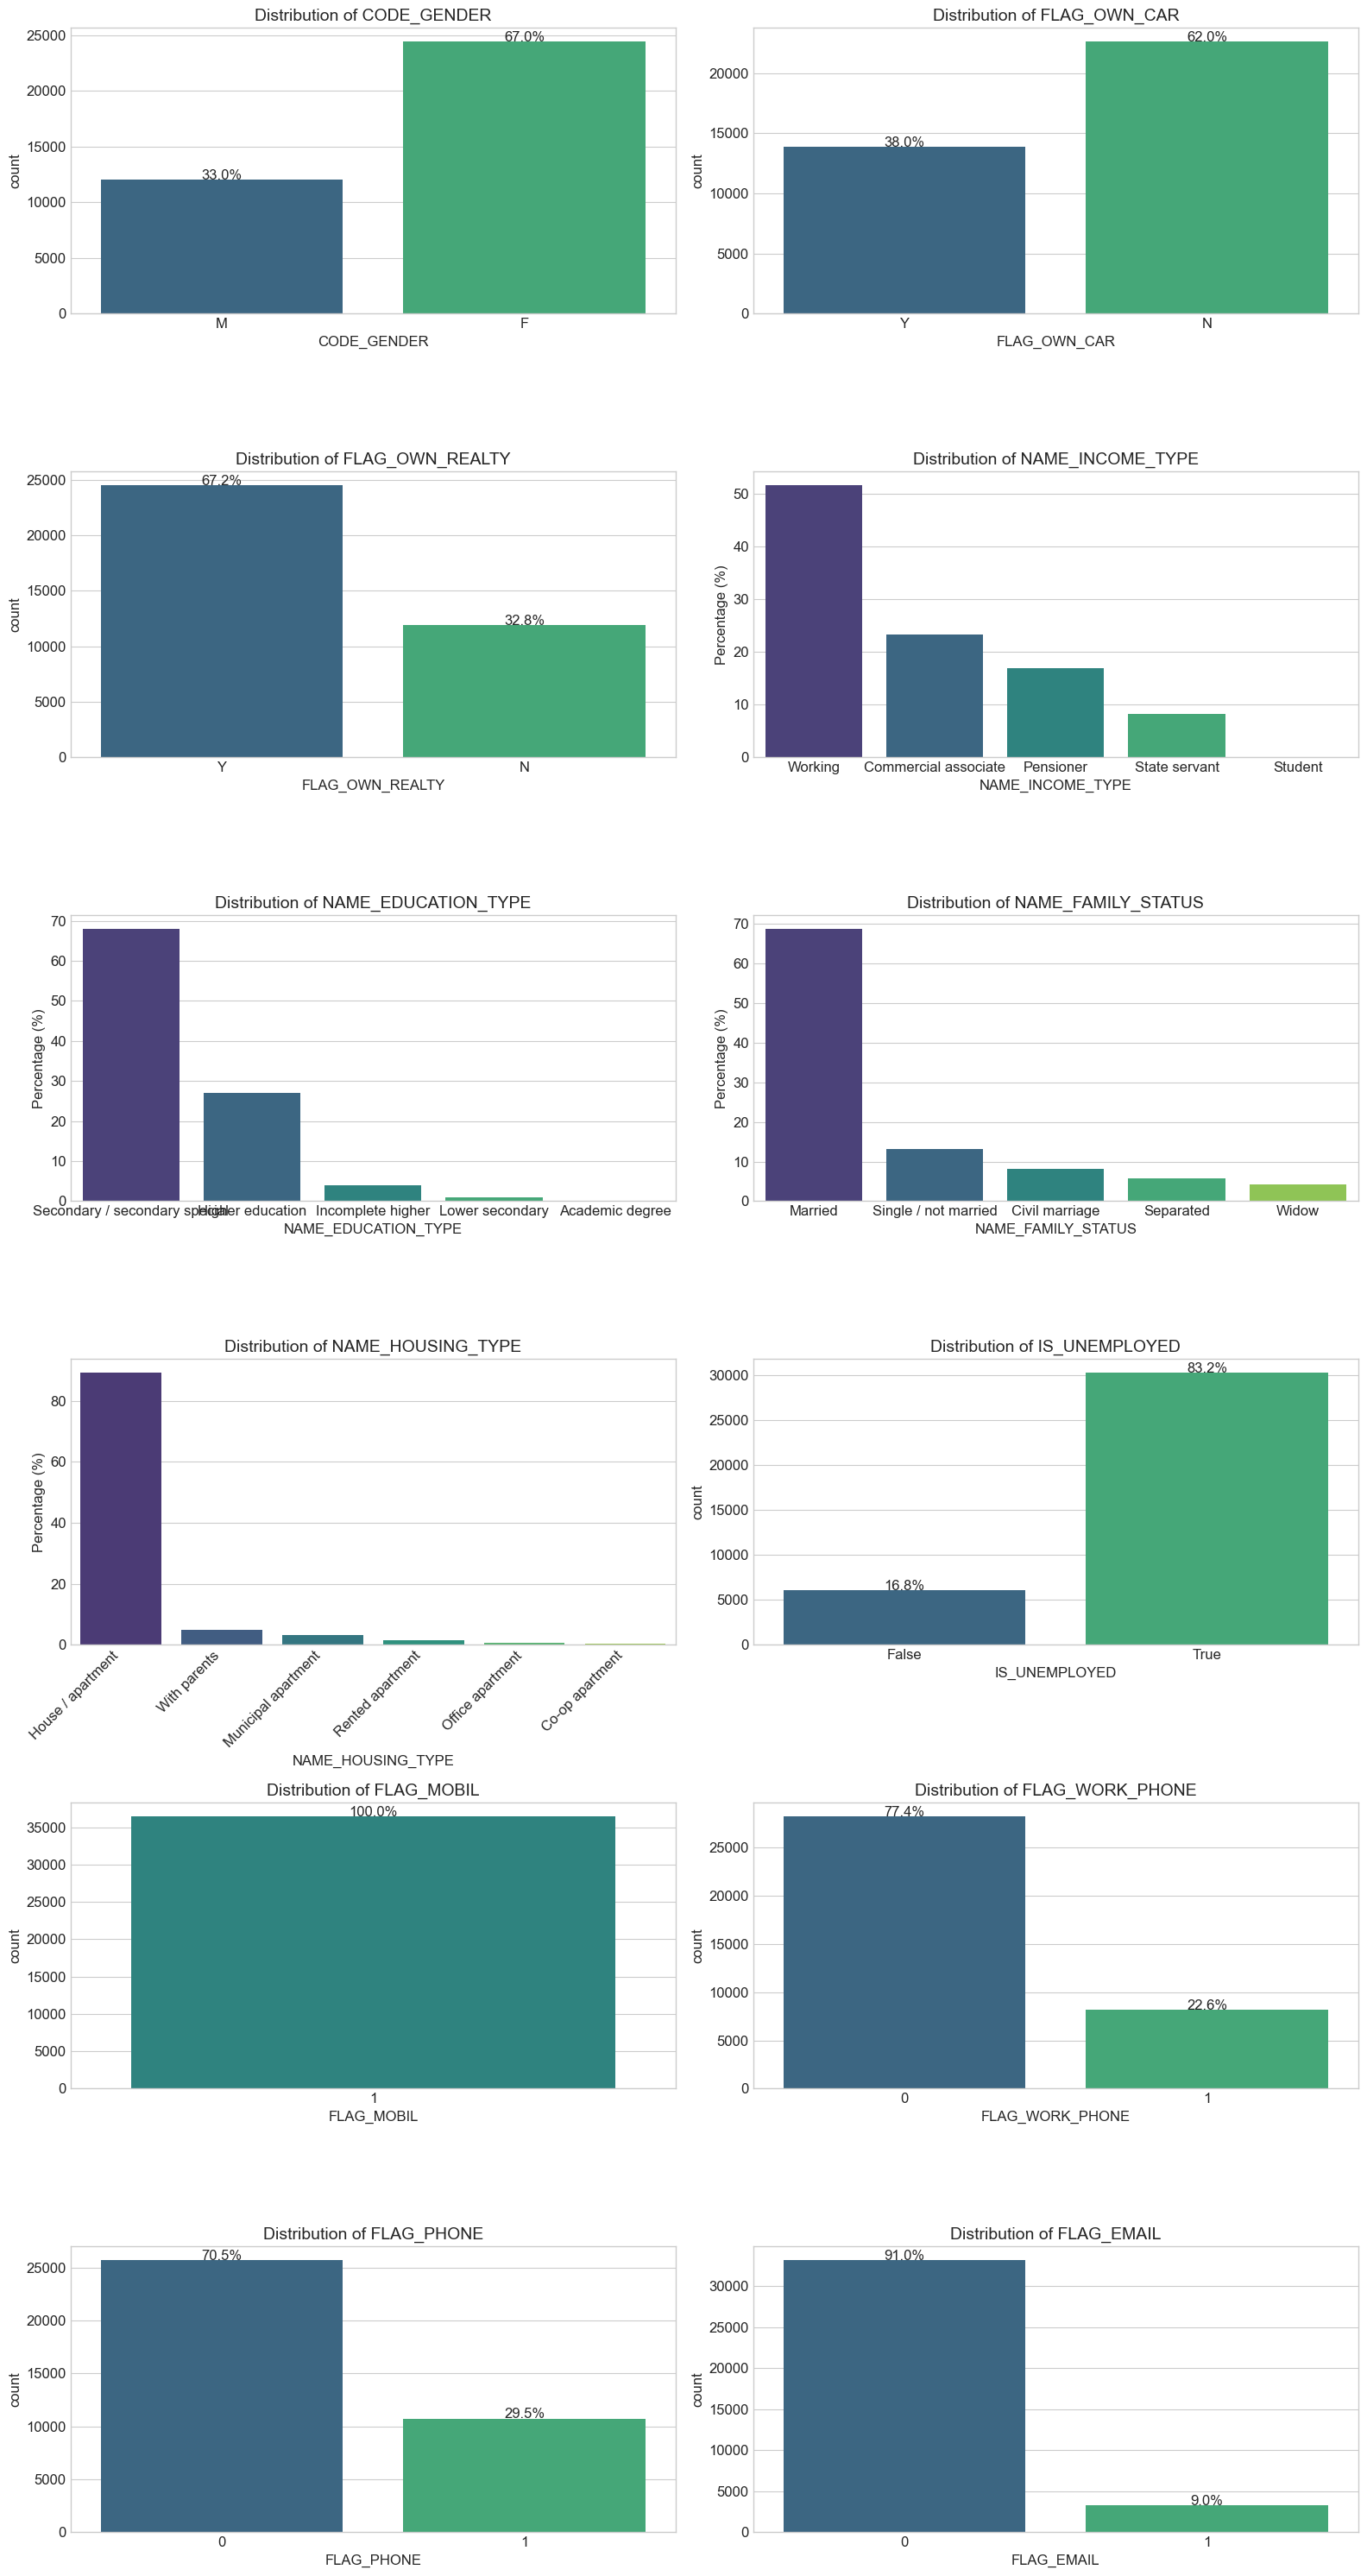

In [19]:
# Define categorical features
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                        'IS_UNEMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

# Function to plot bar charts for categorical features
def plot_categorical_features(df, features, ncols=2):
    nrows = (len(features) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 5 * nrows))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        ax = axes[i]
        value_counts = df[feature].value_counts().sort_values(ascending=False)
        
        # For binary features, use countplot
        if len(value_counts) <= 2:
            sns.countplot(x=feature, data=df, ax=ax, palette='viridis')
            
            # Add percentage labels
            total = len(df)
            for p in ax.patches:
                percentage = f'{100 * p.get_height() / total:.1f}%'
                x = p.get_x() + p.get_width() / 2
                y = p.get_height() + 5
                ax.annotate(percentage, (x, y), ha='center')
        else:
            # For features with more categories, use barplot with percentages
            percentages = 100 * value_counts / total
            sns.barplot(x=percentages.index, y=percentages.values, ax=ax, palette='viridis')
            ax.set_ylabel('Percentage (%)')
            
            # Rotate x-axis labels if needed
            if len(value_counts) > 5:
                plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        ax.set_title(f'Distribution of {feature}', fontsize=14)
        
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

# Plot distributions for categorical features
plot_categorical_features(df, categorical_features)

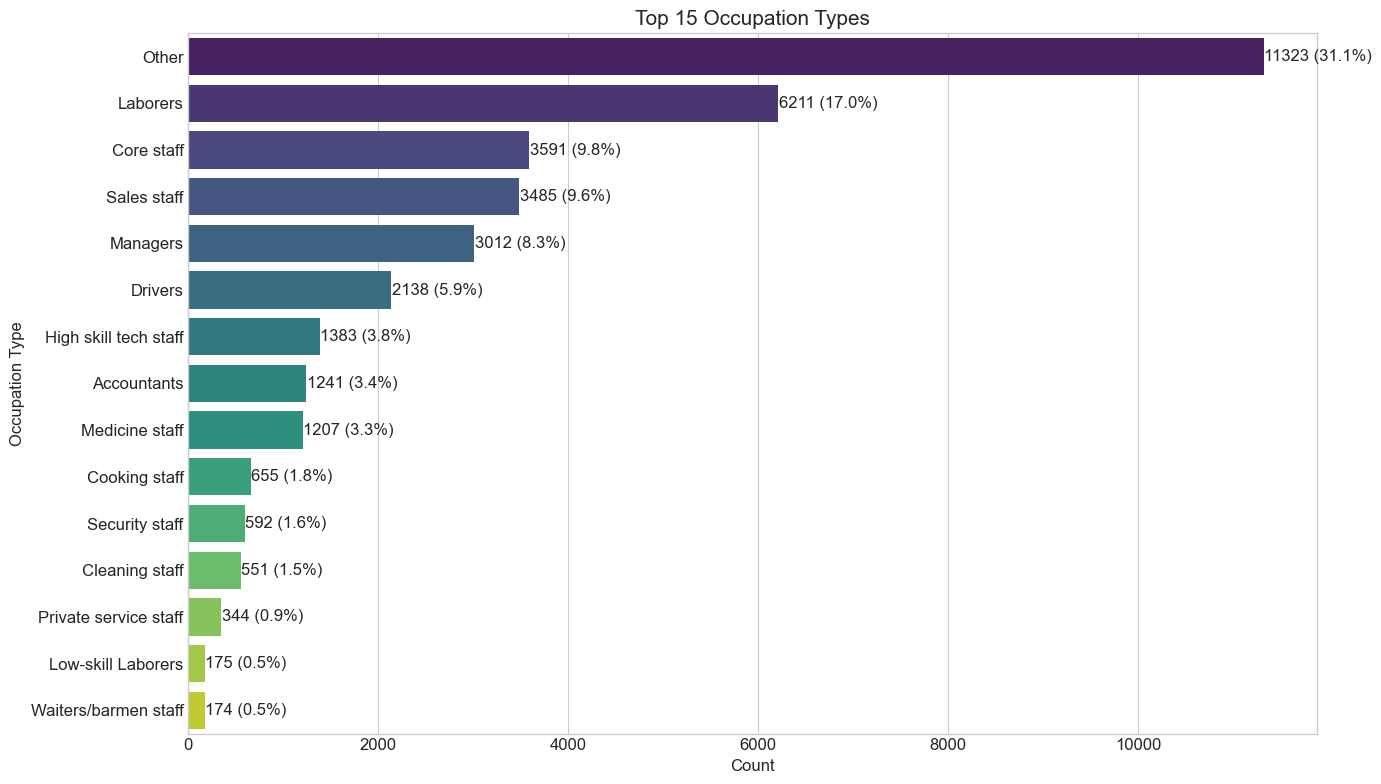

In [20]:
# Occupation type distribution (this may have many categories)
plt.figure(figsize=(14, 8))
occupation_counts = df['OCCUPATION_TYPE'].value_counts()

# Limit to top 15 occupations if there are many
if len(occupation_counts) > 15:
    occupation_counts = occupation_counts.head(15)
    title = 'Top 15 Occupation Types'
else:
    title = 'Distribution of Occupation Types'

# Plot horizontal bar chart for better readability
ax = sns.barplot(y=occupation_counts.index, x=occupation_counts.values, palette='viridis')
plt.title(title, fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Occupation Type', fontsize=12)

# Add count and percentage labels
total = len(df)
for i, v in enumerate(occupation_counts.values):
    percentage = f'{100 * v / total:.1f}%'
    ax.text(v + 5, i, f'{v} ({percentage})', va='center')
    
plt.tight_layout()
plt.show()

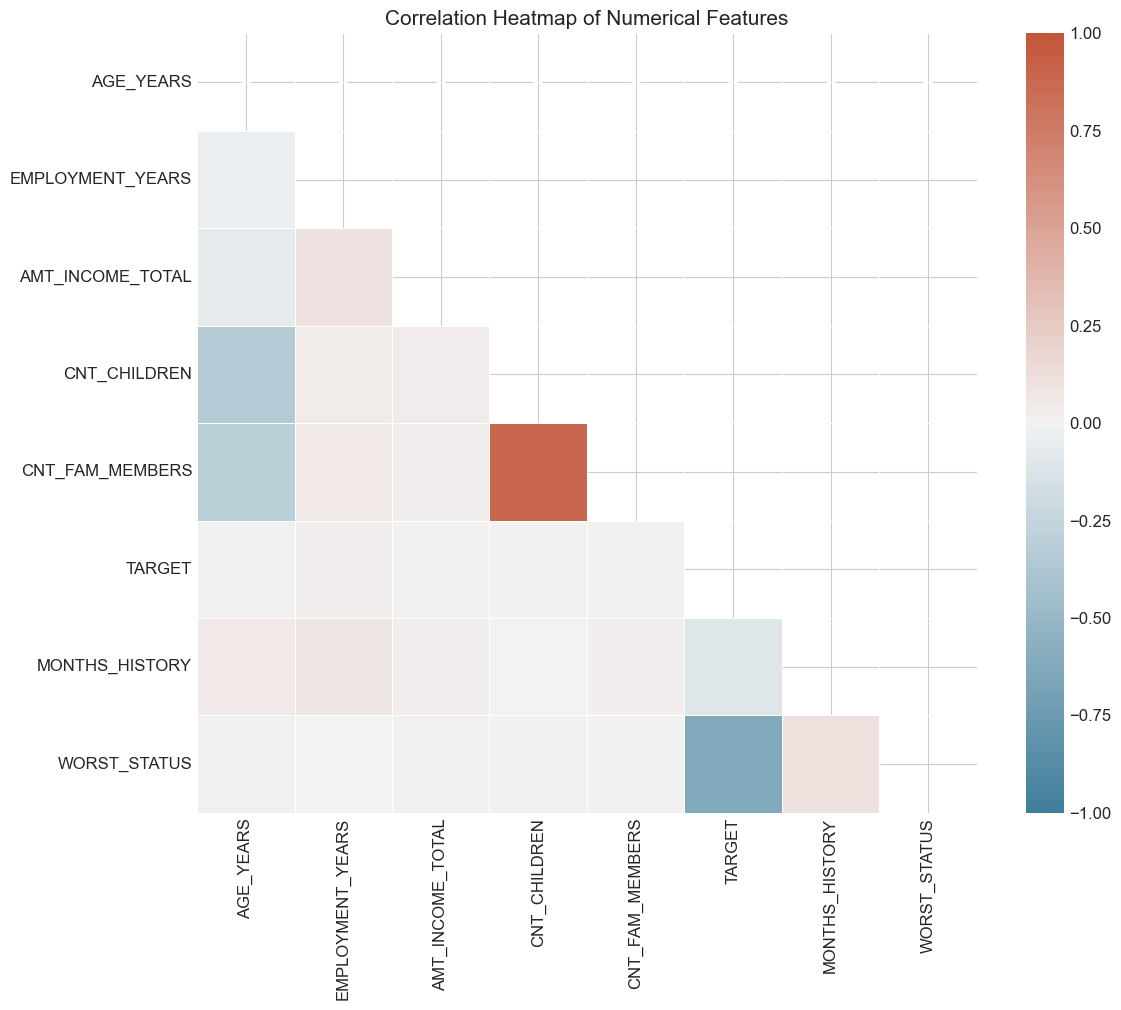

In [21]:
# Select numerical features for correlation analysis
corr_features = ['AGE_YEARS', 'EMPLOYMENT_YEARS', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 
                'CNT_FAM_MEMBERS', 'TARGET', 'MONTHS_HISTORY', 'WORST_STATUS']
corr_df = df[corr_features]

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f')

plt.title('Correlation Heatmap of Numerical Features', fontsize=15)
plt.tight_layout()
plt.show()

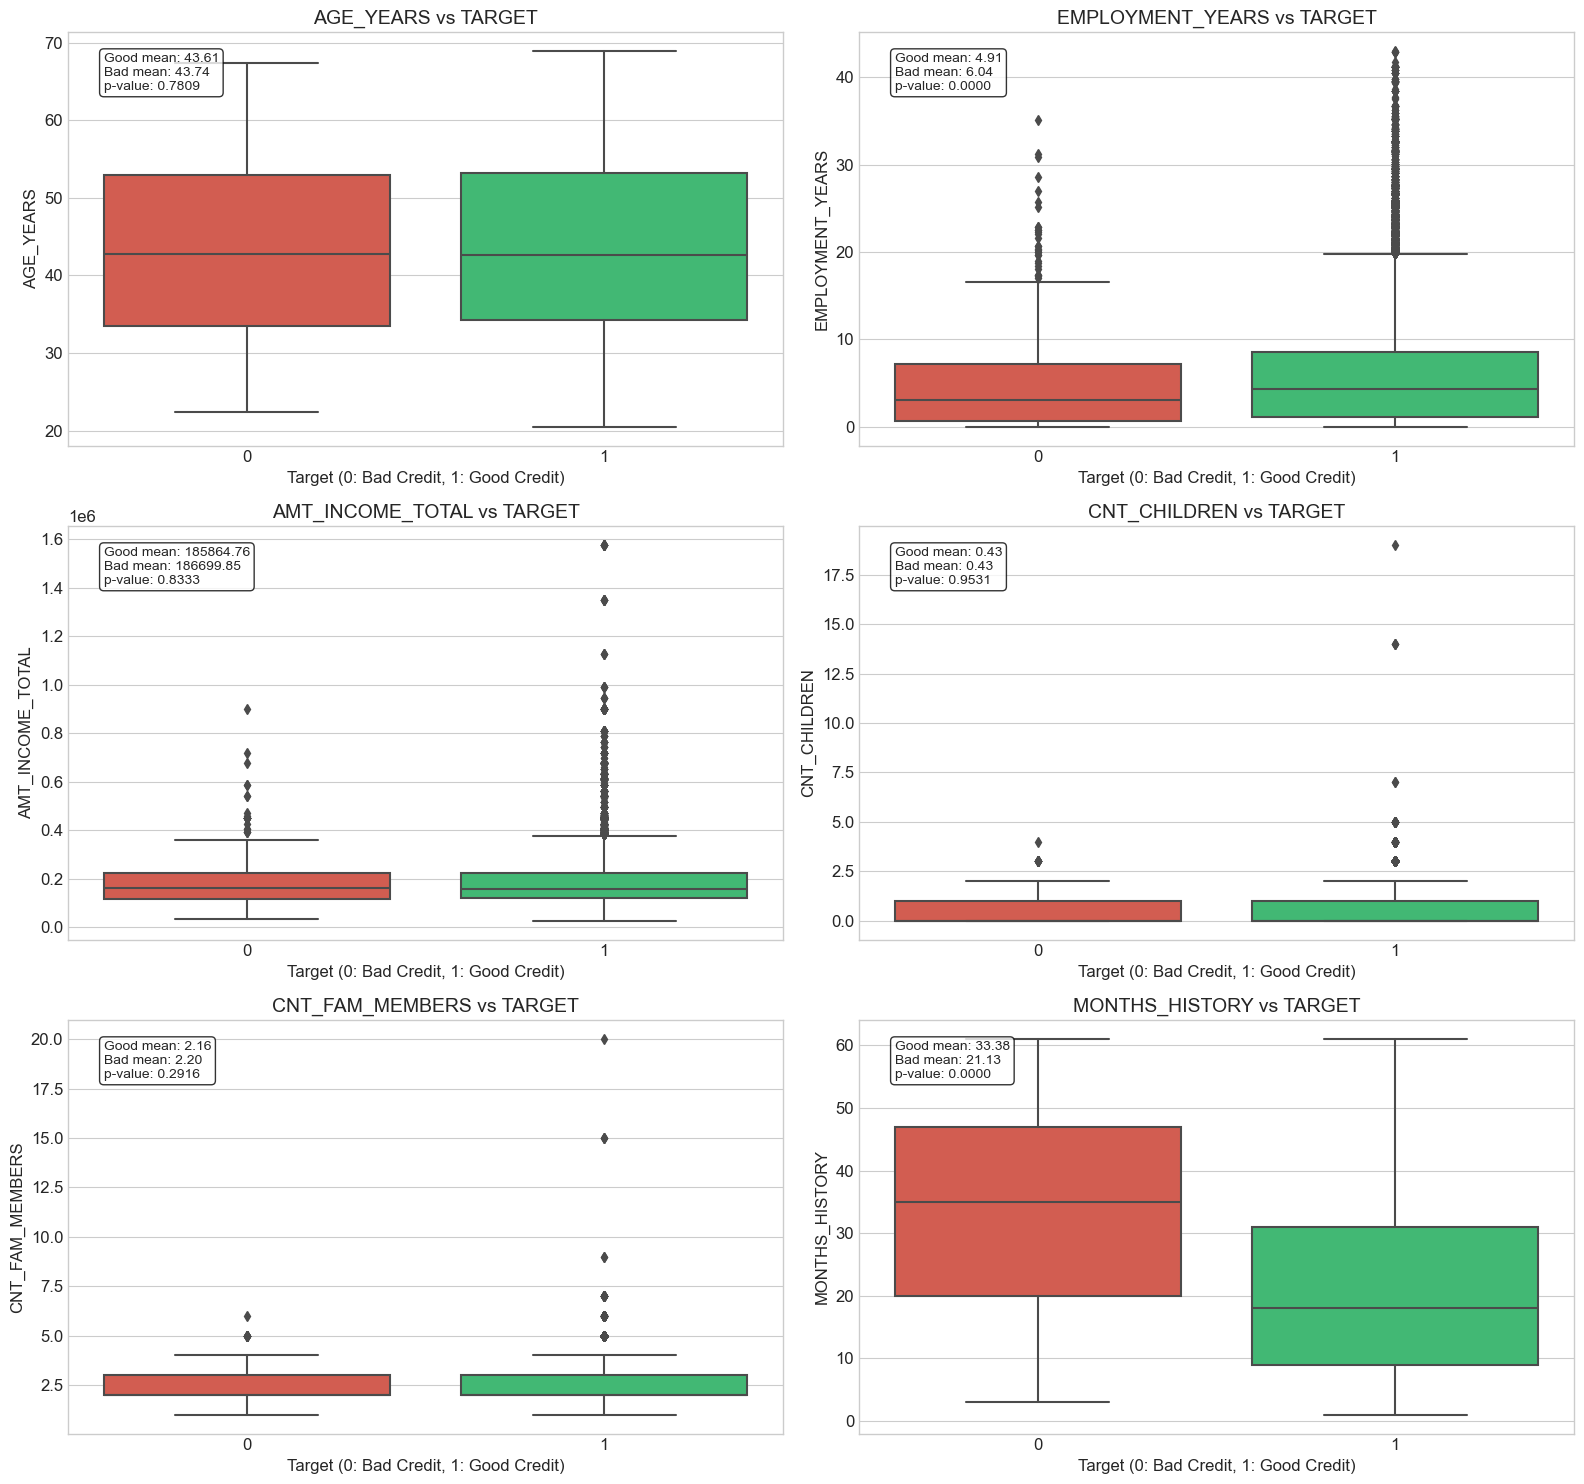

In [24]:
# Numerical features vs Target
def plot_num_vs_target(df, features, target='TARGET', ncols=2):
    nrows = (len(features) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 5 * nrows))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        ax = axes[i]
        sns.boxplot(x=target, y=feature, data=df, ax=ax, palette=['#e74c3c', '#2ecc71'])
        ax.set_title(f'{feature} vs {target}', fontsize=14)
        ax.set_xlabel('Target (0: Bad Credit, 1: Good Credit)', fontsize=12)
        
        # Calculate mean values for good and bad credit
        good_mean = df[df[target] == 0][feature].mean()
        bad_mean = df[df[target] == 1][feature].mean()
        
        # Perform t-test
        t_stat, p_val = stats.ttest_ind(
            df[df[target] == 0][feature].dropna(),
            df[df[target] == 1][feature].dropna(),
            equal_var=False
        )
        
        # Add annotation with means and p-value
        ax.annotate(f'Good mean: {good_mean:.2f}\nBad mean: {bad_mean:.2f}\np-value: {p_val:.4f}',
                   xy=(0.05, 0.95), xycoords='axes fraction',
                   bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
                   va='top', ha='left', fontsize=10)
        
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

# Plot numerical features vs target
plot_num_vs_target(df, numerical_features)

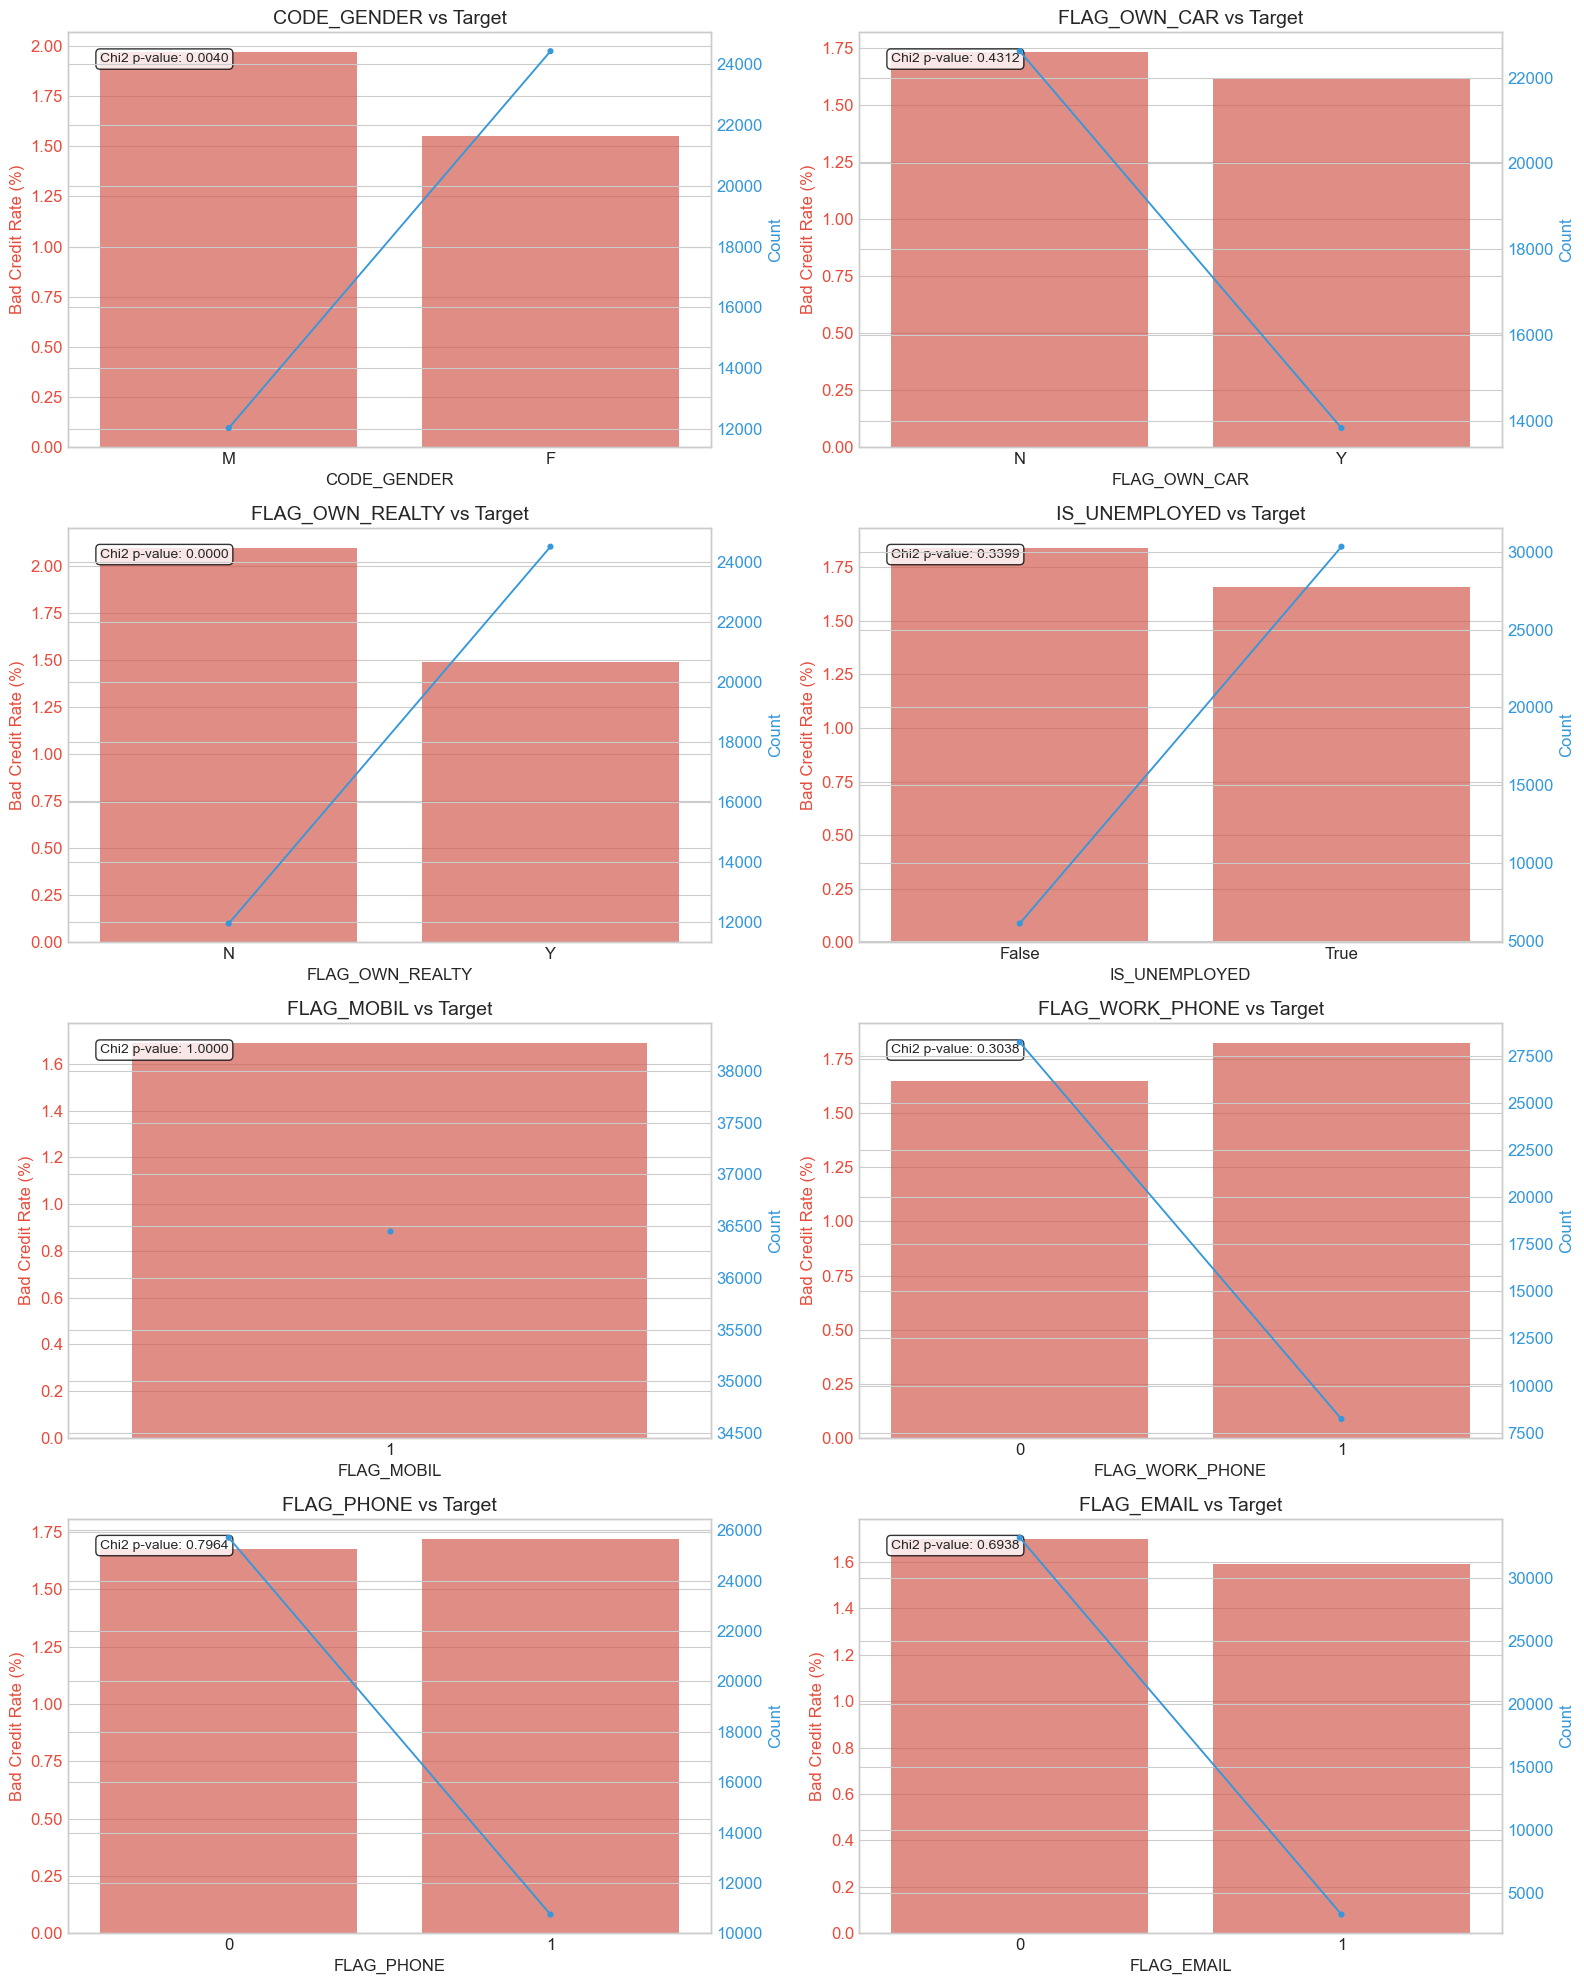

In [26]:
# Categorical features vs Target
def plot_cat_vs_target(df, features, target='TARGET', ncols=2):
    nrows = (len(features) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 5 * nrows))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        ax = axes[i]
        
        # Calculate the percentage of target=1 for each category
        cat_target = df.groupby(feature)[target].mean().reset_index()
        cat_target.columns = [feature, 'Bad_Rate']
        cat_target['Bad_Rate'] = (1-cat_target['Bad_Rate']) * 100
        
        # Add count information
        cat_counts = df[feature].value_counts().reset_index()
        cat_counts.columns = [feature, 'Count']
        cat_data = pd.merge(cat_target, cat_counts, on=feature)
        
        # Sort by bad rate for better visualization
        cat_data = cat_data.sort_values('Bad_Rate', ascending=False)
        
        # Create twin axes for count and bad rate
        ax2 = ax.twinx()
        
        # Plot bad rate as bars
        sns.barplot(x=feature, y='Bad_Rate', data=cat_data, ax=ax, color='#e74c3c', alpha=0.7)
        ax.set_ylabel('Bad Credit Rate (%)', color='#e74c3c')
        ax.tick_params(axis='y', colors='#e74c3c')
        
        # Plot count as line
        sns.pointplot(x=feature, y='Count', data=cat_data, ax=ax2, color='#3498db', scale=0.5)
        ax2.set_ylabel('Count', color='#3498db')
        ax2.tick_params(axis='y', colors='#3498db')
        
        ax.set_title(f'{feature} vs Target', fontsize=14)
        
        # Rotate x-axis labels if needed
        if len(cat_data) > 3:
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        # Chi-square test for independence
        conting_table = pd.crosstab(df[feature], df[target])
        chi2, p, dof, expected = stats.chi2_contingency(conting_table)
        
        # Add annotation with p-value
        ax.annotate(f'Chi2 p-value: {p:.4f}',
                   xy=(0.05, 0.95), xycoords='axes fraction',
                   bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
                   va='top', ha='left', fontsize=10)
        
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

# Select categorical features to analyze (excluding features with too many categories)
selected_cat_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'IS_UNEMPLOYED', 
                         'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

# Plot categorical features vs target
plot_cat_vs_target(df, selected_cat_features)

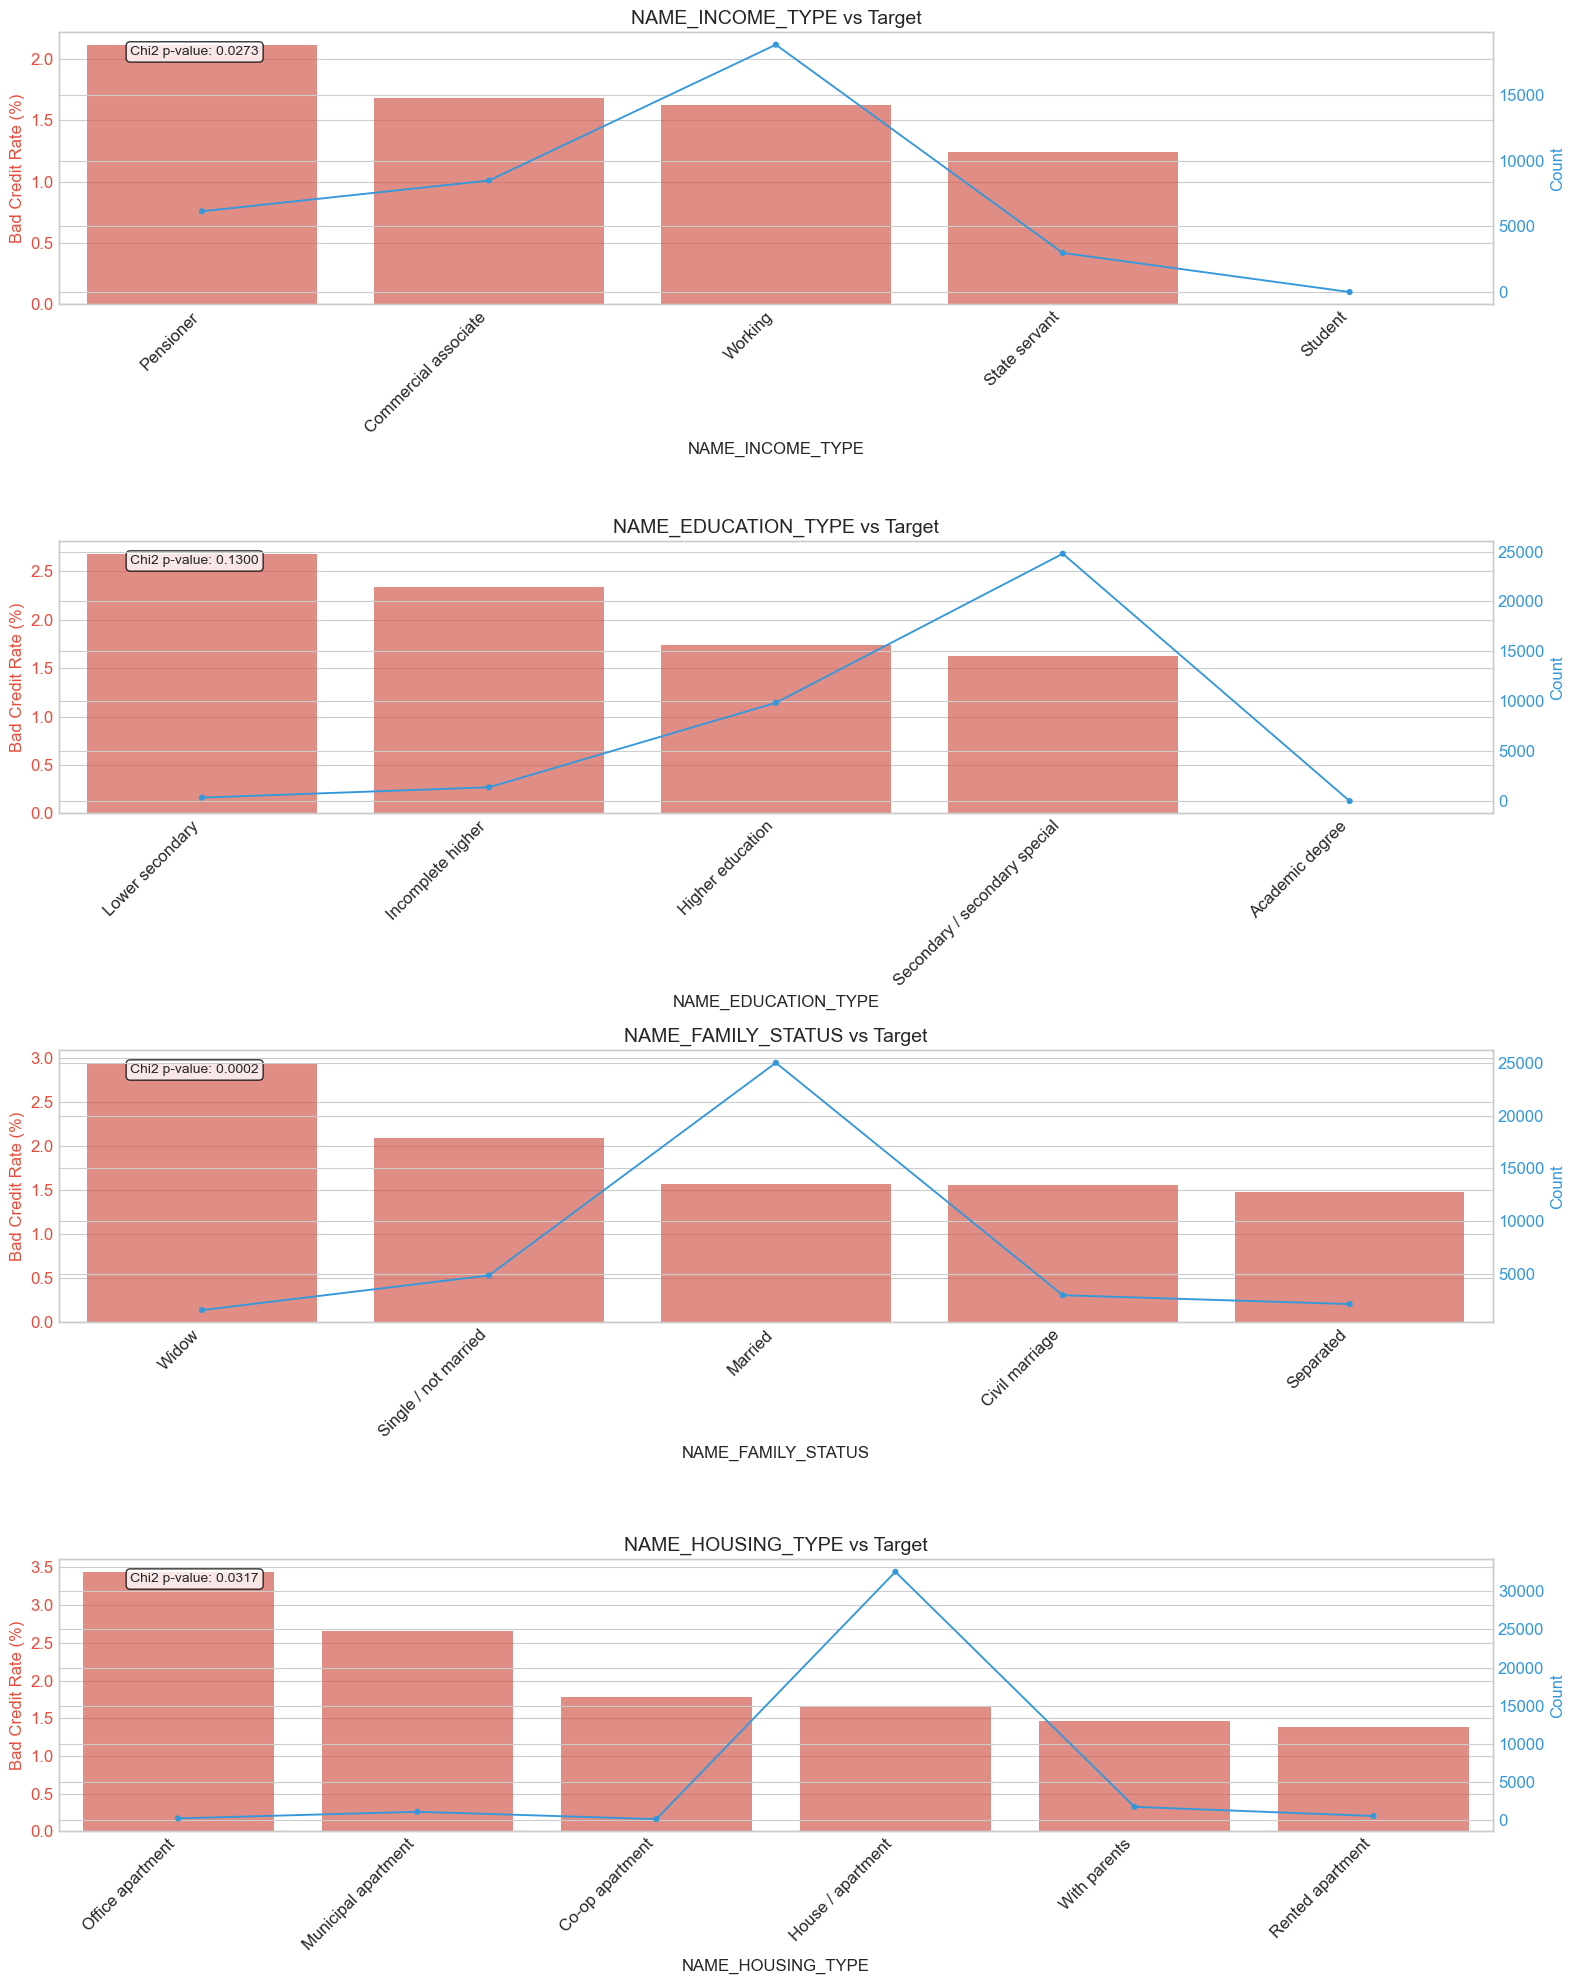

In [27]:
# Plot categorical features with more categories vs target
complex_cat_features = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
plot_cat_vs_target(df, complex_cat_features, ncols=1)

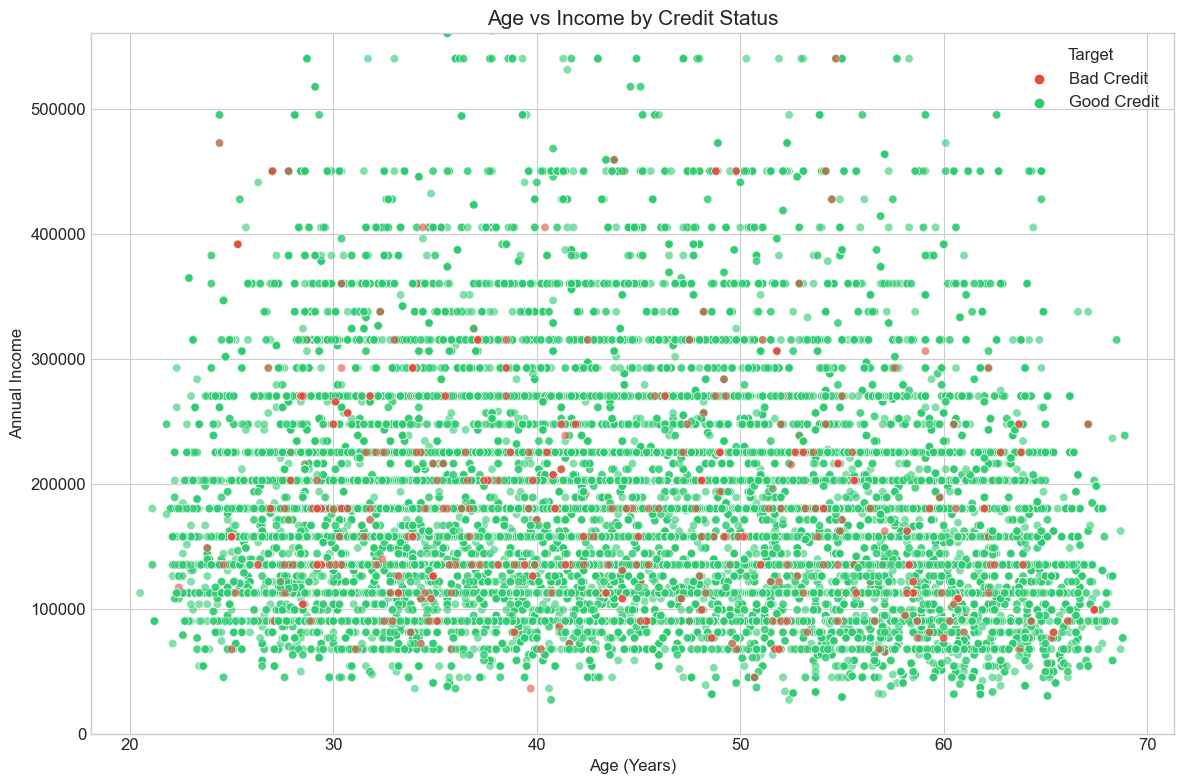

In [30]:
# Age vs Income with Target color
plt.figure(figsize=(12, 8))

# Use a dictionary to map TARGET values to colors explicitly
scatter = sns.scatterplot(
    x='AGE_YEARS', 
    y='AMT_INCOME_TOTAL', 
    hue='TARGET', 
    data=df, 
    palette={1: '#2ecc71', 0: '#e74c3c'}, 
    alpha=0.6
)

plt.title('Age vs Income by Credit Status', fontsize=15)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)

# Get the legend handles and labels from the plot
handles, _ = scatter.get_legend_handles_labels()

# Rebuild the legend with the correct labels and colors
plt.legend(
    handles=handles,
    title='Target',
    labels=['Bad Credit', 'Good Credit']  # Match order in palette
)

# Limit y-axis to better view the distribution
income_99th = df['AMT_INCOME_TOTAL'].quantile(0.99)
plt.ylim(0, income_99th)

plt.tight_layout()
plt.show()

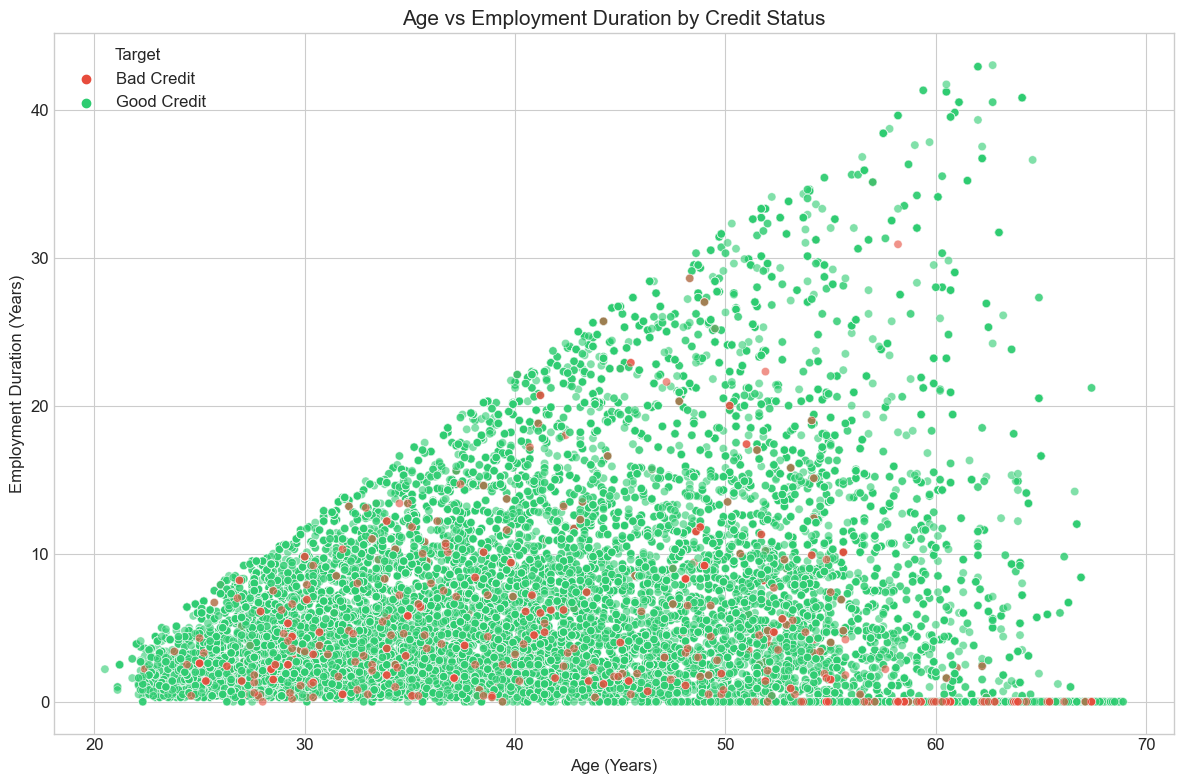

In [32]:
# Age vs Employment Years with Target color
plt.figure(figsize=(12, 8))

# Create the scatterplot with explicit color mapping
scatter = sns.scatterplot(
    x='AGE_YEARS', 
    y='EMPLOYMENT_YEARS', 
    hue='TARGET', 
    data=df, 
    palette={0: '#e74c3c', 1: '#2ecc71'},
    alpha=0.6
)

plt.title('Age vs Employment Duration by Credit Status', fontsize=15)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Employment Duration (Years)', fontsize=12)

# Get the legend handles and rebuild it
handles, _ = scatter.get_legend_handles_labels()
plt.legend(
    handles=handles,
    title='Target',
    labels=['Bad Credit', 'Good Credit'] 
)

plt.tight_layout()
plt.show()

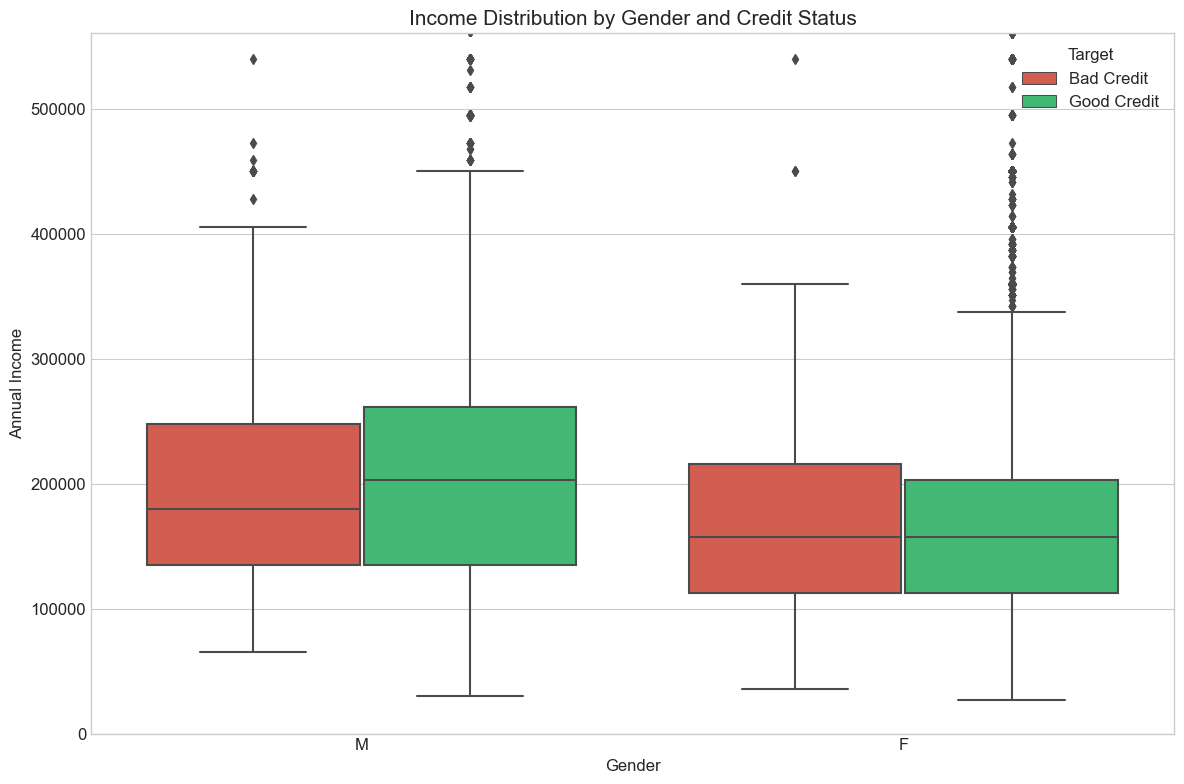

In [33]:
# Income by Gender and Target
plt.figure(figsize=(12, 8))

# Create boxplot with explicit color mapping
box_plot = sns.boxplot(
    x='CODE_GENDER', 
    y='AMT_INCOME_TOTAL', 
    hue='TARGET',
    data=df, 
    palette={1: '#2ecc71', 0: '#e74c3c'} 
)

plt.title('Income Distribution by Gender and Credit Status', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)

# Retrieve legend handles and rebuild with correct labels
handles, _ = box_plot.get_legend_handles_labels()
plt.legend(
    handles=handles,
    title='Target',
    labels=['Bad Credit', 'Good Credit']
)

# Limit y-axis to exclude extreme outliers
income_99th = df['AMT_INCOME_TOTAL'].quantile(0.99)
plt.ylim(0, income_99th)

plt.tight_layout()
plt.show()

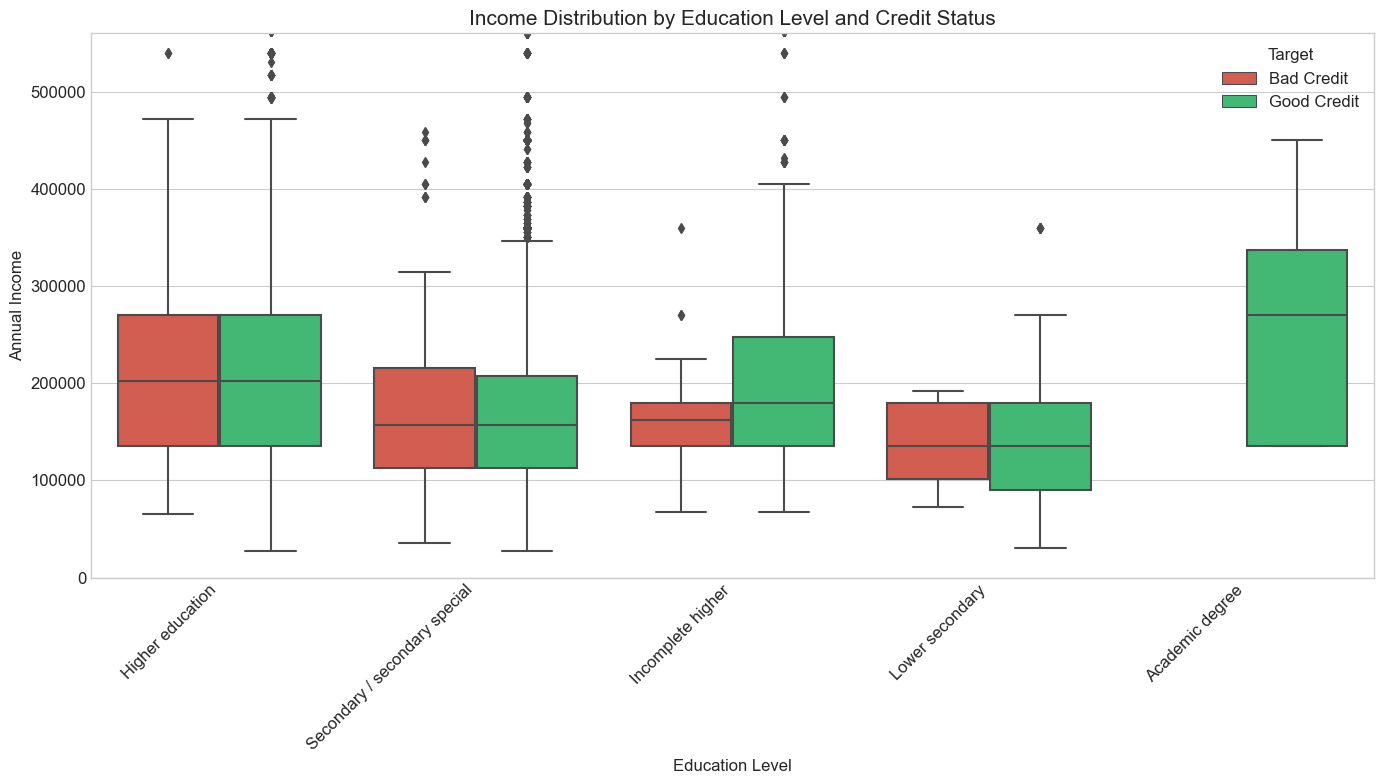

In [34]:
# Education vs Income with Target hue
plt.figure(figsize=(14, 8))

# Create boxplot with explicit color mapping
box_plot = sns.boxplot(
    x='NAME_EDUCATION_TYPE', 
    y='AMT_INCOME_TOTAL', 
    hue='TARGET',
    data=df, 
    palette={1: '#2ecc71', 0: '#e74c3c'} 
)

plt.title('Income Distribution by Education Level and Credit Status', fontsize=15)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)

# Rebuild legend with correct color mappings
handles, _ = box_plot.get_legend_handles_labels()
plt.legend(
    handles=handles,
    title='Target',
    labels=['Bad Credit', 'Good Credit']
)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Limit y-axis to exclude extreme outliers
income_99th = df['AMT_INCOME_TOTAL'].quantile(0.99)
plt.ylim(0, income_99th)

plt.tight_layout()
plt.show()

In [39]:
# Create a summary of findings here based on the actual analysis results
# The following is a placeholder template

print("### Key Insights from Exploratory Data Analysis ###\n")

print("1. Target Distribution:")
target_pct = (1 - df['TARGET'].mean()) * 100
print(f"   - {target_pct:.2f}% of clients have bad credit (TARGET=0)")
print(f"   - {100-target_pct:.2f}% of clients have good credit (TARGET=1)\n")

print("2. Demographic Insights:")
age_bad = df[df['TARGET'] == 0]['AGE_YEARS'].mean()
age_good = df[df['TARGET'] == 1]['AGE_YEARS'].mean()
print(f"   - Average age: {df['AGE_YEARS'].mean():.2f} years")
print(f"   - Age difference: Bad credit clients are on average {age_bad-age_good:.2f} years younger")

gender_bad_rate = (1 - df.groupby('CODE_GENDER')['TARGET'].mean()) * 100
print(f"   - Gender: Males have {gender_bad_rate['M']:.2f}% bad credit rate vs {gender_bad_rate['F']:.2f}% for females\n")

print("3. Financial Indicators:")
income_bad = df[df['TARGET'] == 0]['AMT_INCOME_TOTAL'].mean()
income_good = df[df['TARGET'] == 1]['AMT_INCOME_TOTAL'].mean()
income_diff_pct = (income_good - income_bad) / income_good * 100
print(f"   - Average income for good credit: {income_good:.2f}")
print(f"   - Average income for bad credit: {income_bad:.2f}")
print(f"   - Good credit clients earn {income_diff_pct:.2f}% more on average\n")

print("4. Employment:")
unemployed_bad_rate = (1 - df[df['IS_UNEMPLOYED'] == True]['TARGET'].mean()) * 100
employed_bad_rate = (1 - df[df['IS_UNEMPLOYED'] == False]['TARGET'].mean()) * 100
print(f"   - Unemployed clients have {unemployed_bad_rate:.2f}% bad credit rate")
print(f"   - Employed clients have {employed_bad_rate:.2f}% bad credit rate\n")

print("5. Education:")
edu_bad_rate = (1 - df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)) * 100
print("   - Bad credit rate by education level:")
for edu, rate in edu_bad_rate.items():
    print(f"     * {edu}: {rate:.2f}%")
print("\n")

print("6. Most Predictive Features (based on correlation with TARGET):")
corr_with_target = corr_matrix['TARGET'].abs().sort_values(ascending=False)
for feature, corr in corr_with_target.items():
    if feature != 'TARGET' and corr > 0.05:  # Adjust threshold as needed
        print(f"   - {feature}: {corr:.4f}")
        
print("\nNote: These insights are preliminary and will inform feature engineering and modeling.")

### Key Insights from Exploratory Data Analysis ###

1. Target Distribution:
   - 1.69% of clients have bad credit (TARGET=0)
   - 98.31% of clients have good credit (TARGET=1)

2. Demographic Insights:
   - Average age: 43.74 years
   - Age difference: Bad credit clients are on average -0.13 years younger
   - Gender: Males have 1.97% bad credit rate vs 1.55% for females

3. Financial Indicators:
   - Average income for good credit: 186699.85
   - Average income for bad credit: 185864.76
   - Good credit clients earn 0.45% more on average

4. Employment:
   - Unemployed clients have 1.66% bad credit rate
   - Employed clients have 1.84% bad credit rate

5. Education:
   - Bad credit rate by education level:
     * Academic degree: 0.00%
     * Secondary / secondary special: 1.62%
     * Higher education: 1.73%
     * Incomplete higher: 2.34%
     * Lower secondary: 2.67%


6. Most Predictive Features (based on correlation with TARGET):
   - WORST_STATUS: 0.6315
   - MONTHS_HISTORY: 0.